In [ ]:
!git clone https://github.com/SajjadAemmi/Face-Alignment.git

In [10]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
model = tf.keras.models.load_model('/content/drive/MyDrive/PyLearn 7 Course/55.CNN_Regression/Age_Recognition_Model.h5')

In [44]:
def inference(path, real_age=None):
  width = height = 120

  !python3 align_image.py --input path --output outputs
  aligned_path = 'outputs/' + path.split('.')[0] + '_0.' + path.split('.')[1]

  img = cv2.imread(aligned_path)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  input = cv2.resize(img , (width,height))
  input = input / 255.0
  input = np.reshape(input, [1, width, height, 3])

  output = model.predict(input)

  plt.imshow(img)
  if real_age != None:
    plt.title(f'Predicted age : {int(output)}\nReal Age : {real_age}\nLoss : {int(real_age-output)}')
  else:
    plt.title(f'Predicted age : {int(output)}')
  plt.show()

1/1 [==============================] - 0s 67ms/step


<ipython-input-44-838396c59482>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'Predicted age : {int(output)}\nReal Age : {real_age}\nLoss : {int(real_age-output)}')


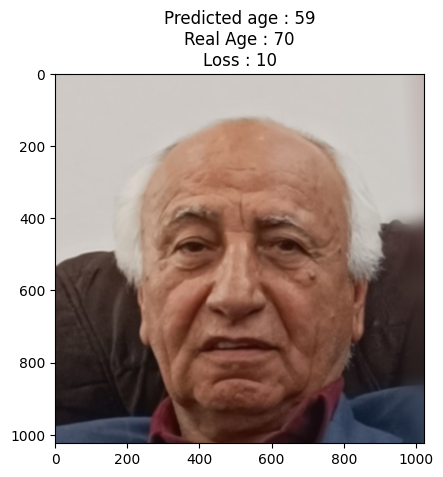

In [47]:
inference('pics/Grandpa.jpg', real_age=70)